In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

data = pd.read_csv("diabetes.csv", header=None, names=col_names)
print(data.shape)
data.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [4]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','bp','pedigree']
x = data[feature_cols]
y = data.label

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)

display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(614, 6)

(614,)

(154, 6)

(154,)

In [6]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state=5)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [7]:
print('y_pred: ', y_pred)

y_pred:  [0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 0]


In [8]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ', conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score: ', Accuracy_score)

Confusion Matrix:  [[85 15]
 [24 30]]
Accuracy Score:  0.7467532467532467


In [9]:
print('Accuracy in Percentage: ', int(Accuracy_score * 100), '%')

Accuracy in Percentage:  74 %


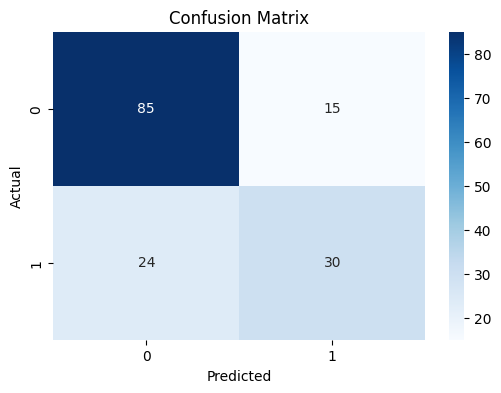

In [10]:
# Example: create confusion matrix dataframe
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# Plot with seaborn
plt.figure(figsize=(6,4))
sn.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()